# Exercise 20 - CostSensitive Churn

[paper](http://download.springer.com/static/pdf/125/art%253A10.1186%252Fs40165-015-0014-6.pdf?originUrl=http%3A%2F%2Fdecisionanalyticsjournal.springeropen.com%2Farticle%2F10.1186%2Fs40165-015-0014-6&token2=exp=1462974790~acl=%2Fstatic%2Fpdf%2F125%2Fart%25253A10.1186%25252Fs40165-015-0014-6.pdf*~hmac=05041d990b7e5a5e70d6efc1fbb29c2a380465c6edc84be1feda1b6d49588a1a)
[slides](http://www.slideshare.net/albahnsen/maximizing-a-churn-campaigns-profitability-with-cost-sensitive-predictive-analytics)

Customer churn predictive modeling deals with predicting the probability of a customer defecting 
using historical, behavioral and socio-economical information. This tool is of great benefit to 
subscription based companies allowing them to maximize the results of retention campaigns. The 
problem of churn predictive modeling has been widely studied by the data mining and machine learning
communities. It is usually tackled by using classification algorithms in order to learn the 
different patterns of both the churners and non-churners. Nevertheless, current state-of-the-art 
classification algorithms are not well aligned with commercial goals, in the sense that, the models 
miss to include the real financial costs and benefits during the training and evaluation phases. In 
the case of churn, evaluating a model based on a traditional measure such as accuracy or predictive 
power, does not yield to the best results when measured by the actual financial cost, i.e., 
investment per subscriber on a loyalty campaign and the financial impact of failing to detect a 
real churner versus wrongly predicting a non-churner as a churner.


The two main objectives of subscription-based companies are to  acquire new subscribers and 
retain those they already have, mainly because profits are directly linked with the number of 
subscribers.  In order to maximize the profit, companies must increase the customer base by 
incrementing sales  while decreasing the number of churners. Furthermore, it is common knowledge 
that retaining a  customer is about five times less expensive than acquiring a new one , this creates  pressure to have better and more effective churn campaigns.

A typical churn campaign consists in identifying from the current customer base which ones are 
more likely to leave the company, and make an offer in order to avoid that behavior.
With this in mind the companies use intelligence to create and improve retention and collection
strategies. In the first case, this usually implies an offer that can be either a discount or a 
free upgrade during certain span of time. In both cases the company has to 	assume a cost for that 
offer, therefore, accurate prediction of the churners becomes important. The logic of this flow is 
shown in the following figure.

![fig1](ch5_fig1.png)

The churn campaign process starts with the sales that every month increase the customer 
base, however, monthly there is a group of customers that decide to leave the company for many 
reasons. Then the objective of a churn model is to identify those customers before they take the 
decision of defecting.

Using a churn model, those customers more likely to leave are predicted as churners and 
an offer is made in order to retain them. However, it is known that not all customers will accept 
the offer, in the case when a customer is planning to defect, it is possible that the offer is not 
good enough to retain him or that the reason for defecting can not be influenced by an offer.
Using historical information, it is estimated that a customer will accept the offer with 
probability $\gamma$.
On the other hand, there is the case in which the churn model misclassified a non-churner as 
churner, also known as false positives, in that case the customer will always accept the offer that 
means and additional cost to the company since those misclassified customers do not have the 
intentions of leaving.

In the case were the churn model predicts customers as non-churners, there is also the possibility 
of a misclassification, in this case an actual churner is predicted as non-churner, since 
these customers do not receive an offer and they will leave the company, these cases are known as 
false negatives. Lastly, there is the case were the customers are actually non-churners, then 
there is no need to make a retention offer to these customers since they will continue to be part 
of the customer base.

It can be seen that a churn campaign (or churn model) has three main points. First, avoid false 
positives since there is a financial cost of making an offer where it is not needed. Second, find 
the right offer to give to those customers identified as churners. And lastly, to decrease 
the number of false negatives.

In the following figure, the financial impact of a churn model is shown. 

![fig1](ch5_fig2.png)

Note than we take 
into account the costs and not the profit in each case.
When a customer is predicted to be a churner, an offer is made with the objective of avoiding 
the customer defecting. However, if a customer is actually a churner, he may or not accept the 
offer with a probability $\gamma_i$. If the customer accepts the offer, the financial impact is 
equal to the cost of the offer ($C_{o_i}$) plus the administrative cost of contacting the 
customer ($C_a$). On the other hand, if the customer declines the offer, the cost is the 
expected 	income that the clients would otherwise generate, also called customer lifetime value 
($CLV_i$), 	plus $C_a$. Lastly, if the customer is not actually a churner, he will be happy to 
accept the 	offer and the cost will be $C_{o_i}$ plus $C_a$.
	
In the case that the customer is predicted as non-churner, there are two possible outcomes. 
Either the customer is not a churner, then the cost is zero, or the customer is a churner and the 
cost is $CLV_i$. 



|  	| Actual Positive ($y_i=1$)  	|  Actual Negative 	($y_i=0$)|
|---	|:-:	|:-:	|
|   Predicted Positive ($c_i=1$)	|   $C_{TP_i}=\gamma_iC_{o_i}+(1-\gamma_i)(CLV_i+C_a)$	| $C_{FP_i}=C_{o_i}+C_a$ |
|  Predicted Negative  ($c_i=0$) 	|   $C_{FN_i}=CLV_i$	| $C_{TN_i}=0$	|

In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile
with zipfile.ZipFile('cost_sensitive_classification_churn.csv.zip', 'r') as z:
    f = z.open('cost_sensitive_classification_churn.csv')
    data = pd.io.parsers.read_table(f, sep=',')

In [3]:
data.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x42,x43,x44,x45,x46,C_FP,C_FN,C_TP,C_TN,target
0,0,0,1,1,1,0,1,1,0,0,...,1,1,5,2,2,74.000000,1028.571429,121.828571,0,0
1,1,0,1,1,1,0,1,1,0,0,...,3,1,5,2,4,53.428571,1028.571429,82.742857,0,0
2,2,1,1,1,1,0,1,1,0,0,...,1,8,3,1,4,66.285714,1285.714286,102.928571,0,0
3,3,1,1,1,0,0,1,1,0,0,...,1,8,4,3,2,92.000000,1285.714286,151.785714,0,0
4,4,0,1,1,1,0,1,1,0,0,...,1,7,5,2,4,53.428571,1028.571429,82.742857,0,0


In [4]:
data.target.value_counts(normalize=True)

0    0.952127
1    0.047873
Name: target, dtype: float64

In [5]:
X =data[['x'+str(i) for i in range(1, 47)]]
y = data.target
cost_mat = data[['C_FP','C_FN','C_TP','C_TN']].values

In [6]:
from  sklearn.cross_validation import train_test_split
temp = train_test_split(X, y, cost_mat, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = temp

# Exercice 20.1 (3 points)


* Train 4 different models to predict target (Churn) using x1-x46 as features
1. Logistic Regression
2. Ensemble
3. Under-sampling LR
4. Under-sampling Ensemble

## LR

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# make predictions for testing set
y_pred_class = logreg.predict(X_test)


0.949289405685


## Ensemble - Boosting

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagreg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=1)

In [24]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [27]:
# calculate RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.24045069654234788

## Under Sampling LR and Under Sampling Ensamble

In [47]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [51]:
models = {'lr': LinearRegression(),
          'gb': BaggingClassifier()}

X_u, y_u = UnderSampling(X_train, y_train,0.5,321)

for model in models.keys():
    models[model].fit(X_u, y_u)
    
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

# Exercice 20.2

* Calculate the savings of the different models
* Compare F1Score and Savings

In [60]:
# LR
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.947674418605


In [62]:
from sklearn import metrics
for model in models.keys():
    print(model, 'f1score',metrics.f1_score(y_pred[model],y_test))

gb f1score 0.13821815154


ValueError: Can't handle mix of continuous and binary

# Exercice 20.3 (2 points)

Using the probabilities of each model estimate a BMR classifier

Compare the savings and F1Score

In [72]:
classifiers = {"GB": {"f": BaggingClassifier()},
               "LR": {"f": LogisticRegression()}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(X_train, y_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(X_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(X_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(X_train)
    
# Evaluate the performance
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
measures = {"f1": f1_score, "pre": precision_score, 
            "rec": recall_score, "acc": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_test, classifiers[model]["c"]) for measure in measures.keys()]

# Calculation of the cost and savings
from costcla.metrics import savings_score, cost_loss 

# Evaluate the savings for each model
results["sav"] = np.zeros(results.shape[0])
for model in classifiers.keys():
    results["sav"].loc[model] = savings_score(y_test, classifiers[model]["c"], cost_mat_test)



from costcla.models import BayesMinimumRiskClassifier
ci_models = list(classifiers.keys())

for model in ci_models:
    classifiers[model+"-BMR"] = {"f": BayesMinimumRiskClassifier()}
    # Fit
    classifiers[model+"-BMR"]["f"].fit(y_test, classifiers[model]["p"])  
    # Calibration must be made in a validation set
    # Predict
    classifiers[model+"-BMR"]["c"] = classifiers[model+"-BMR"]["f"].predict(classifiers[model]["p"], cost_mat_test)
    # Evaluate
    results.loc[model+"-BMR"] = 0
    results.loc[model+"-BMR", measures.keys()] = \
    [measures[measure](y_test, classifiers[model+"-BMR"]["c"]) for measure in measures.keys()]
    results["sav"].loc[model+"-BMR"] = savings_score(y_test, classifiers[model+"-BMR"]["c"], cost_mat_test)

print(results)

             pre        f1       acc       rec       sav
GB      0.060000  0.028986  0.935078  0.019108 -0.001947
LR      0.000000  0.000000  0.949289  0.000000  0.000000
GB-BMR  0.086188  0.146893  0.707364  0.496815  0.108048
LR-BMR  0.083556  0.146646  0.646641  0.598726  0.138900


/Users/FelipeGarcia/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/FelipeGarcia/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


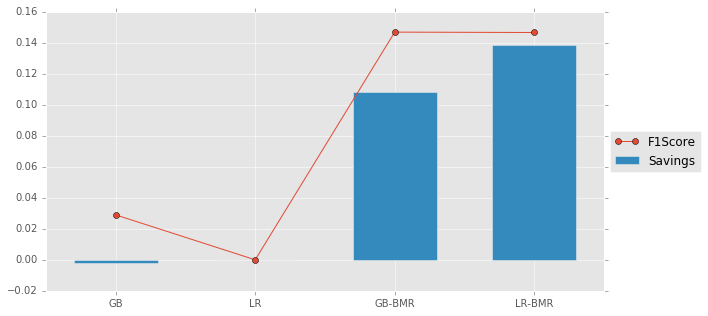

In [74]:
# Plot the results
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Plot the results
ind = np.arange(results.shape[0])
figsize(10, 5)
ax = plt.subplot(111)
l = ax.plot(ind, results["f1"], "-o", label='F1Score')
b = ax.bar(ind-0.3, results['sav'], 0.6, label='Savings')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-0.5, ind[-1]+.5])
ax.set_xticks(ind)
ax.set_xticklabels(results.index)
plt.show()

La regresión logistica no da buenos resultados ni con el F1Score ni con Saving. Podemos ver que al aplicar BMR ambos metodos obtienen mejores resultados pero sobresale la regresión logistica.

# Exercice 20.4

Estimate a CostSensitiveDecisionTreeClassifier

In [76]:
from costcla.models import CostSensitiveDecisionTreeClassifier

classifiers["CSDT"] = {"f": CostSensitiveDecisionTreeClassifier()}
# Fit
classifiers["CSDT"]["f"].fit(X_train, y_train, cost_mat_train)
# Predict
classifiers["CSDT"]["c"] = classifiers["CSDT"]["f"].predict(X_test)
# Evaluate
results.loc["CSDT"] = 0
results.loc["CSDT", measures.keys()] = \
[measures[measure](y_test, classifiers["CSDT"]["c"]) for measure in measures.keys()]
results["sav"].loc["CSDT"] = savings_score(y_test, classifiers["CSDT"]["c"], cost_mat_test)


TypeError: unhashable type: 'slice'